In [42]:
!pip install -U imbalanced-learn

   ---------------------------------------- 258.3/258.3 kB 1.8 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

SyntaxError: invalid syntax (_metadata_requests.py, line 1512)

In [4]:
df = pd.read_csv("diabetes.csv")

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [36]:
X = df[df.columns[:-1]].values
y = df[df.columns[-1]].values

In [38]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
data = np.hstack((X,y.reshape(-1,1)))
transformed_df = pd.DataFrame(data,columns=df.columns)

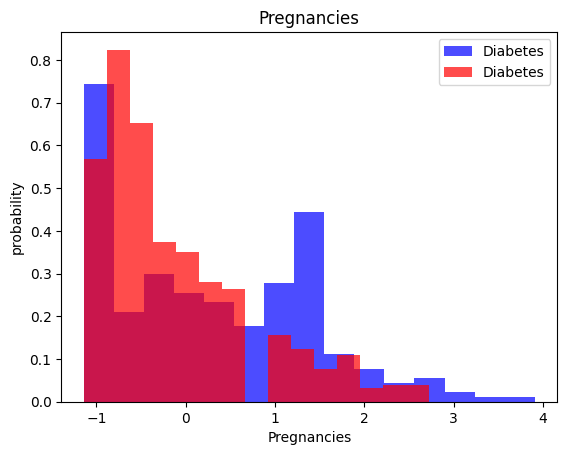

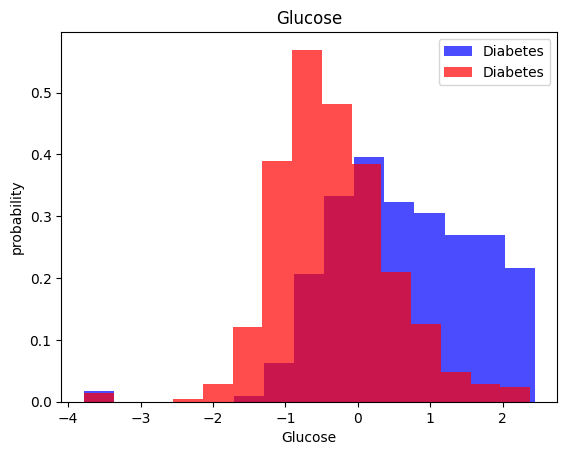

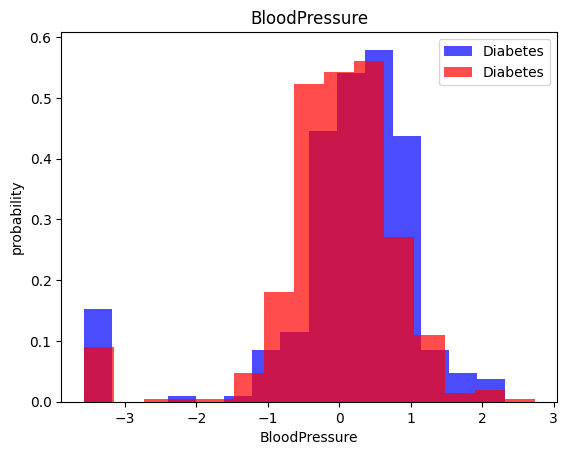

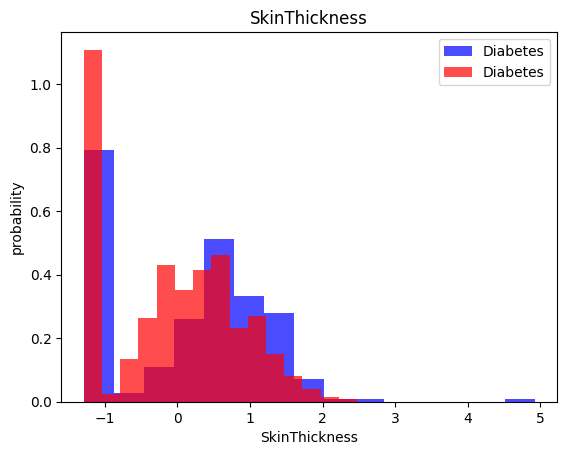

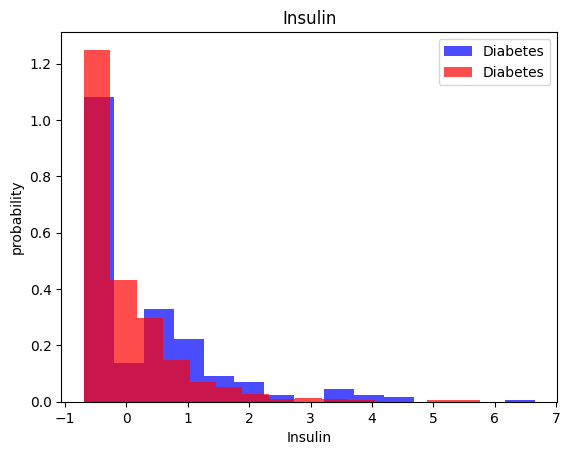

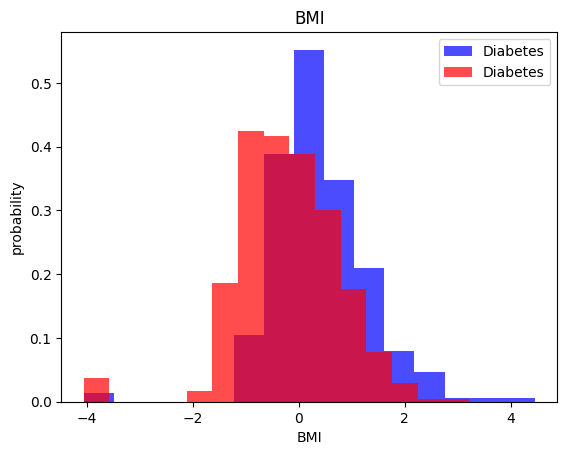

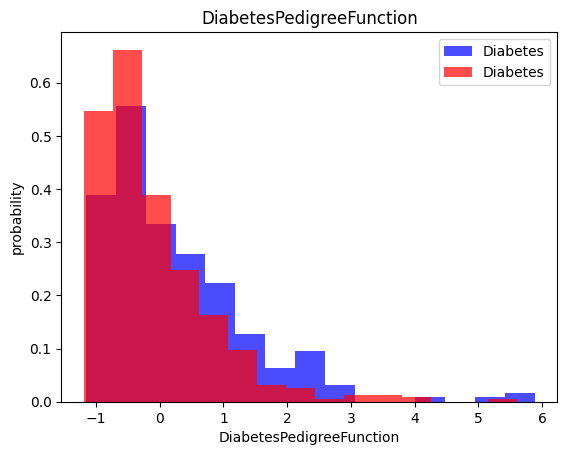

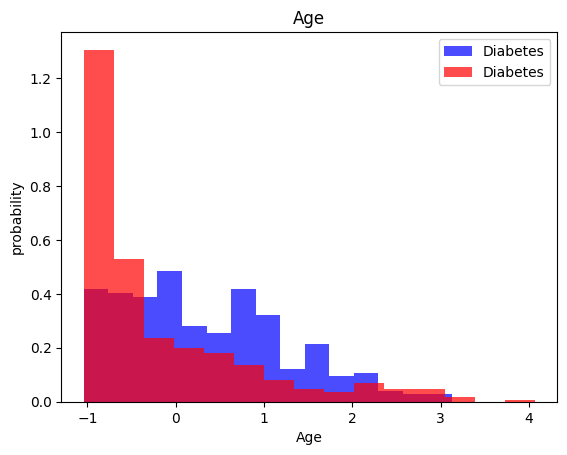

In [34]:
for i in range(len(df.columns[:-1])):
    label =df.columns[i]
    plt.hist(transformed_df[transformed_df['Outcome']==1][label],color='blue',label='Diabetes',alpha = 0.7,density=True,bins=15)
    plt.hist(transformed_df[transformed_df['Outcome']==0][label],color='red',label='Diabetes',alpha = 0.7,density=True,bins=15)
    plt.title(label)
    plt.ylabel('probability')
    plt.xlabel(label)
    plt.legend()
    plt.show()

In [14]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=0)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

In [40]:
len(transformed_df[transformed_df['Outcome']==1]),len(transformed_df[transformed_df['Outcome']==0])

(268, 500)

In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
    
])

In [18]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             loss = tf.keras.losses.BinaryCrossentropy(),
             metrics = ['accuracy'])

In [20]:
model.evaluate(X_train,y_train)

15/15 [==============================] - 0s 2ms/step - loss: 13.8717 - accuracy: 0.6413


[13.871661186218262, 0.6413043737411499]

In [24]:
model.fit(X_train,y_train, batch_size = 16, epochs = 20,validation_data= (X_valid,y_valid))

Epoch 1/20
29/29 [==============================] - 1s 6ms/step - loss: 9.3987 - accuracy: 0.6348 - val_loss: 3.3053 - val_accuracy: 0.6429
Epoch 2/20
29/29 [==============================] - 0s 2ms/step - loss: 2.5362 - accuracy: 0.5870 - val_loss: 1.4348 - val_accuracy: 0.5779
Epoch 3/20
29/29 [==============================] - 0s 2ms/step - loss: 1.0774 - accuracy: 0.6217 - val_loss: 1.1046 - val_accuracy: 0.6234
Epoch 4/20
29/29 [==============================] - 0s 2ms/step - loss: 0.9617 - accuracy: 0.6609 - val_loss: 0.9916 - val_accuracy: 0.6429
Epoch 5/20
29/29 [==============================] - 0s 2ms/step - loss: 0.8822 - accuracy: 0.6522 - val_loss: 0.9449 - val_accuracy: 0.6039
Epoch 6/20
29/29 [==============================] - 0s 2ms/step - loss: 0.8475 - accuracy: 0.6370 - val_loss: 0.8983 - val_accuracy: 0.6234
Epoch 7/20
29/29 [==============================] - 0s 2ms/step - loss: 0.8190 - accuracy: 0.6435 - val_loss: 0.8711 - val_accuracy: 0.6429
Epoch 8/20
29/29 [==